<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [66]:
# A:
df = pd.read_csv(sac_csv)
df['zip'] = df['zip'].astype(object)
#converted integer zipcode to object type
mask = df['price'] < 0
df.loc[mask]
df = df.drop(df.index[703])
#dropped row that included negative price value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 984
Data columns (total 12 columns):
street       984 non-null object
city         984 non-null object
zip          984 non-null object
state        984 non-null object
beds         984 non-null int64
baths        984 non-null int64
sq__ft       984 non-null int64
type         984 non-null object
sale_date    984 non-null object
price        984 non-null int64
latitude     984 non-null float64
longitude    984 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 99.9+ KB


In [68]:
df['price_normed'] = (df['price'] - df['price'].mean()) / df['price'].std()
mask = df['price_normed'] > 3
new_df = df.drop(df[mask].index)
#Dropping observations that are more than 3 standard deviations from the mean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 984
Data columns (total 13 columns):
street          971 non-null object
city            971 non-null object
zip             971 non-null object
state           971 non-null object
beds            971 non-null int64
baths           971 non-null int64
sq__ft          971 non-null int64
type            971 non-null object
sale_date       971 non-null object
price           971 non-null int64
latitude        971 non-null float64
longitude       971 non-null float64
price_normed    971 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 106.2+ KB


In [77]:
mask_sqft = new_df['sq__ft'] == 0 
df_cleaned_sqft = new_df.drop(new_df[mask_sqft].index) 
#getting rid of observations with incomplete sq__ft information
from pandas.plotting import scatter_matrix
df = df_cleaned_sqft.drop('price_normed', axis=1)
df.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.651354,0.693985,0.435452,-0.113666,0.038515
baths,0.651354,1.000000,0.727170,0.480329,-0.095031,0.083913
sq__ft,0.693985,0.727170,1.000000,0.687779,-0.108275,0.109828
price,0.435452,0.480329,0.687779,1.000000,0.042184,0.240921
latitude,-0.113666,-0.095031,-0.108275,0.042184,1.000000,0.342525
longitude,0.038515,0.083913,0.109828,0.240921,0.342525,1.000000


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

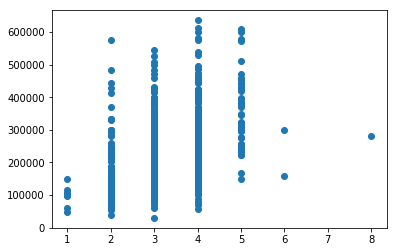

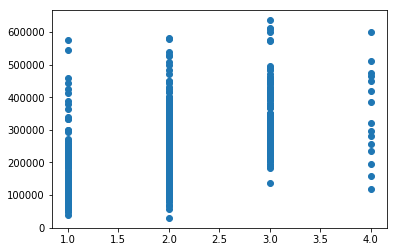

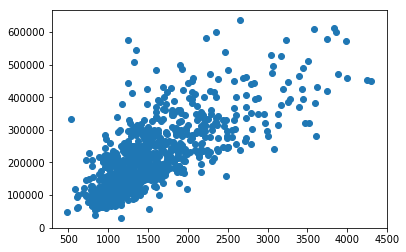

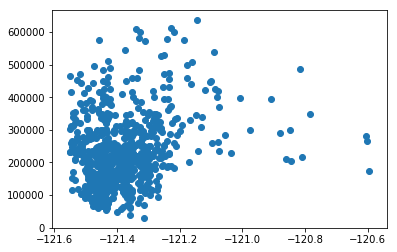

In [90]:
# A
masked = df['sq__ft'] > 5000
df.loc[df[masked].index]
df = df.drop(df[masked].index)
#dropping large outler w/ sq__ft, price was 2000 for too many sqft
cols = ['beds', 'baths', 'sq__ft', 'longitude']
for col in cols:
    plt.scatter(x=df[col], y=df['price'])
    plt.show()

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:It looks like sqft would be the best indicator, which is what we would have
#predicted- it likely captures variation by bathroom/beds -which it also is highly
#correlated with. 

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [99]:
def interslope(df, list1, list2):
    y_bar = df[list2].mean()
    x_bar = df[list1].mean()
    std_y = df[list2].std()
    std_x = df[list1].std()
    r_xy = df.corr().loc[list1, list2]
    beta_1 = r_xy*(std_y/std_x)
    beta_0 = y_bar - beta_1*x_bar
    return beta_0, beta_1
beta_0, beta_1 = interslope(df, 'sq__ft', 'price')
df['yhat'] = beta_0 + beta_1 * df['sq__ft']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,yhat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,132929.460657
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,173826.403039
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,127987.231970
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,134906.352132
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,128110.787687


### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:
#for each unit increase (increase by 1 square foot), the price
#will increase on average by 123 dollars.
#The slope has no direct meaning here (0 sqft means no house),
#but theoretically it means a house w/ 0 sqft would cost
#$29636. 

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:
"""You could plug the sqft info of a model sacramento house (that is
yet to be built)into the model to obtain prediction. Inference
would be using the model to identify the present population 
mean price increase for a 1 sqft increase in house size"""


### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

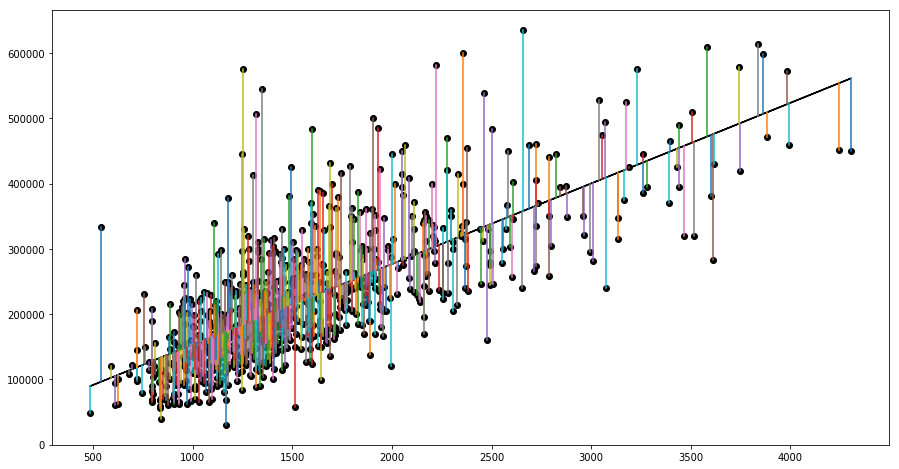

In [100]:
# A:
fig = plt.figure(figsize=(15, 7))
fig.set_figheight(8)
fig.set_figwidth(15)
ax = fig.gca()
ax.scatter(x=df['sq__ft'], y=df['price'], c='k')
ax.plot(df['sq__ft'], df['yhat'], color='k')
    
for blank, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['yhat']))